In [1]:
import os
os.getcwd()

'C:\\Users\\stunn\\Notebook'

Import all the required packages for logistic regression, manipulating dataframes, plotting and splititng the data into test and train subsets

In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd # For our DataFrame
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import confusion_matrix

In [4]:
data1= pd.read_csv('datasets_228_482_diabetes.csv')

In [5]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#check if there are any missing values

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Seperate the independent and dependent variables
X=data1.drop('Outcome',axis=1)
y=data1['Outcome']

In [10]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")       #we can choose any solver/optimizer e.g. newton-cg, liblinear, lbfgs, sag

model.fit(X_train, y_train)                          #train model
#predict on test
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

coef_df = pd.DataFrame(model.coef_)                  #place all coef into a pandas dataframe
coef_df['intercept'] = model.intercept_              #add new column called intercept
print(coef_df)

          0         1         2         3         4         5        6  \
0  0.118692  0.028567 -0.018967 -0.001967 -0.000207  0.053683  0.48428   

          7  intercept  
0  0.003386  -5.346922  


**.score() function - Evaluates classfication accuracy of the model**

In [13]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7727272727272727


**.confusion_matrix() function**

In [15]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

print(cm)
print(type(cm))

[[29 26]
 [ 9 90]]
<class 'numpy.ndarray'>


<Axes: >

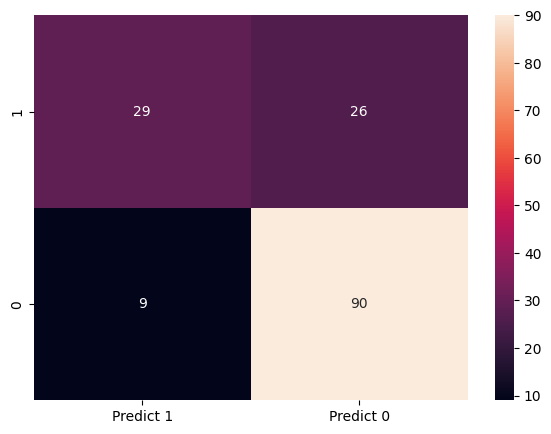

In [16]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])              #convert to pandas from ndarray


#with matrix, data is now represented as heatmap using seaborn
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [17]:
print(df_cm)
type(df_cm)


#we find that sensitivity will fare pooly. Sensitivity will be low
#sensitivity or recall = TP / (TP + FN) = 30 / (30 + 25) = approx 54%

   Predict 1  Predict 0
1         29         26
0          9         90


pandas.core.frame.DataFrame

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 30

True Negatives (TN): we correctly predicted that they don't have diabetes 90

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 25  Falsely predict negative Type II error

In [19]:
print(metrics.classification_report(y_train, y_predict_train))

# we notice that precision is good but sensitivity(recall) for 1 is low.

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       401
           1       0.74      0.54      0.62       213

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



In [20]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.76      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



We can see that the F1 scores , precision and recall are close between test and train datasets and hence there is no issue of overfitting

# Let us now use the Heart dataset

the same packages we used in the diabetes data set will suffice and hence we are not importing them again, However, if you wish to 
replicate this analysis in a seperate jupyter notebook or a session then you have to import the packages mentioned in 
diabetes dataset

In [24]:
data2= pd.read_csv('datasets_33180_43520_heart.csv')

In [25]:
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,det disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,det disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    int64  
 2   cp           303 non-null    int64  
 3   trestbps     303 non-null    int64  
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           303 non-null    int64  
 12  thal         303 non-null    int64  
 13  det disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
#Seperate the independent and dependent variables
X=data2.drop('det disease',axis=1)
y=data2['det disease']

In [29]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [30]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

#predict on test
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.002556 -1.853231  1.020748 -0.021589 -0.003274  0.135837  0.647756   

          7        8       9        10        11        12  intercept  
0  0.036657 -0.89157 -0.6397  0.226911 -0.636153 -0.361066   0.300452  


**.score() function - Evaluates classfication accuracy of the model**

In [32]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7540983606557377


<Axes: >

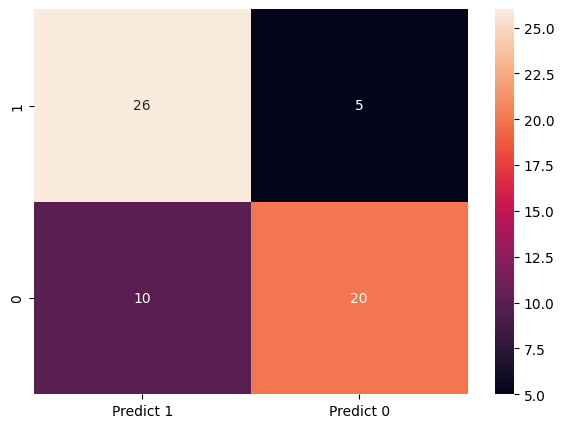

In [33]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [34]:
print(metrics.classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       108
           1       0.85      0.93      0.89       134

    accuracy                           0.87       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.87      0.87       242



In [35]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

